# Assignment Code: DA-AG-010
## Regression & Its Evaluation | Assignment

---



### Question 1: What is Simple Linear Regression?
**Answer:**  
Simple Linear Regression is a statistical method used to model the relationship between two variables:  
- One independent variable (X)  
- One dependent variable (Y)  

It assumes a straight-line relationship between X and Y, expressed as:  

\[
Y = \beta_0 + \beta_1 X + \epsilon
\]  

Where:  
- \( Y \) = Dependent variable  
- \( X \) = Independent variable  
- \( \beta_0 \) = Intercept  
- \( \beta_1 \) = Slope  
- \( \epsilon \) = Error term  

The aim is to minimize the difference between actual and predicted values (least squares method).


### Question 2: What are the key assumptions of Simple Linear Regression?
**Answer:**  
1. **Linearity** – Relationship between X and Y is linear.  
2. **Independence** – Observations are independent.  
3. **Homoscedasticity** – Constant variance of errors.  
4. **Normality of Errors** – Residuals are normally distributed.  
5. **No multicollinearity** – Relevant in multiple regression, not simple.  

Violating assumptions can cause biased or inefficient estimates.


### Question 3: What is heteroscedasticity, and why is it important?
**Answer:**  
Heteroscedasticity means residuals (errors) do not have constant variance across all values of X.  

- Example: Small errors for low X, large errors for high X.  

**Why important?**  
- Violates regression assumptions.  
- Makes standard errors unreliable.  
- Can lead to wrong conclusions in hypothesis testing.  

Fixes: transformations, Weighted Least Squares, or robust errors.


### Question 4: What is Multiple Linear Regression?
**Answer:**  
Multiple Linear Regression (MLR) models the relationship between one dependent variable and **two or more independent variables**.  

Equation:  

\[
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon
\]  

It predicts outcomes using multiple features but requires checks for multicollinearity.


### Question 5: What is polynomial regression, and how does it differ from linear regression?
**Answer:**  
Polynomial Regression models the relationship as an nth-degree polynomial.  

Example (2nd degree):  

\[
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon
\]  

**Difference from Linear Regression:**  
- Linear regression → straight line.  
- Polynomial regression → curved line (nonlinear).  
- Useful when data shows curvature.


### Question 6:  Implement a Python program to fit a Simple Linear Regression model to the following sample data:
**Data:**  
X = [1, 2, 3, 4, 5]  
Y = [2.1, 4.3, 6.1, 7.9, 10.2]\
Plot the regression line over the data points.
(Include your Python code and output in the code box below.)

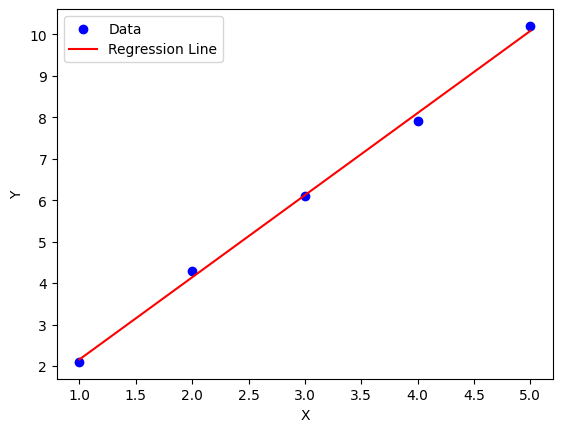

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


### Question 7:  Fit a Multiple Linear Regression model on this sample data:
**Data:**  
Area = [1200, 1500, 1800, 2000]  
Rooms = [2, 3, 3, 4]  
Price = [250000, 300000, 320000, 370000]\
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)


In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area','Rooms']]
Y = data['Price']

X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const).fit()
print(model.summary())

# VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Thu, 09 Oct 2025   Prob (F-statistic):             0.0377
Time:                        07:21:30   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Question 8:   Implement polynomial regression on the following data:
**Data:**  
X = [1, 2, 3, 4, 5]  
Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)


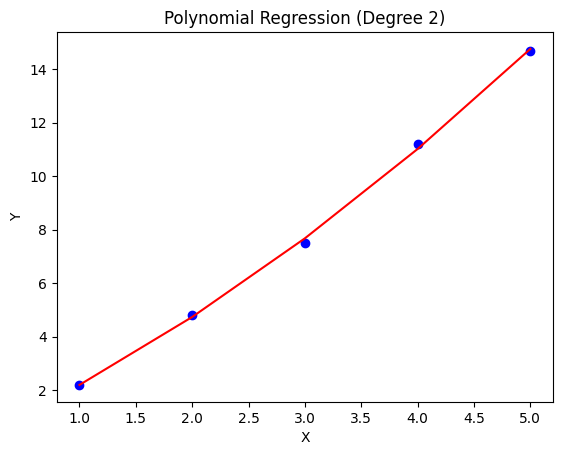

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


### Question 9: Create a residuals plot for a regression model trained on this data:
**Data:**  
X = [10, 20, 30, 40, 50]  
Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)


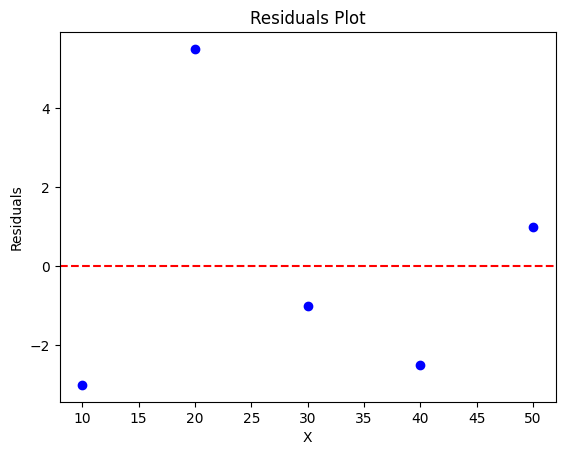

In [4]:
X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(X,Y)
Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


### Question 10:  Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
**Answer:**  
As a data scientist predicting house prices:  

1. **Fixing Heteroscedasticity**  
   - Transform variables (log/sqrt).  
   - Use Weighted Least Squares.  
   - Apply robust regression.  

2. **Fixing Multicollinearity**  
   - Calculate VIF.  
   - Drop or combine correlated features (e.g., Rooms & Area).  
   - Use PCA or Regularization (Ridge/Lasso).  

3. **Validation**  
   - Perform cross-validation.  
   - Evaluate metrics like RMSE, R², Adjusted R².  

This ensures a robust and reliable model.
